In [141]:
import numpy as np
import urllib
import scipy.optimize
import random

def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)

print "Reading data..."
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print "done"

Reading data...
done


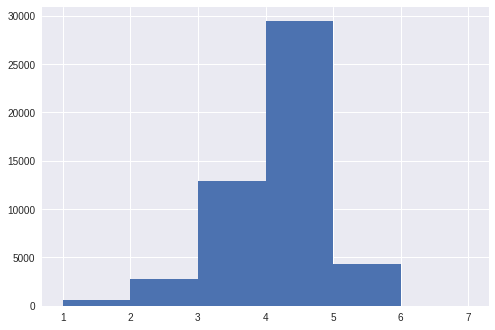

In [142]:
import matplotlib.pyplot as plt

tastes = [d['review/taste'] for d in data]
plt.hist(tastes, bins=[1,2,3,4,5,6,7])
plt.show()



In [143]:
data2 = [d for d in data if d.has_key('beer/style')]

def feature(datum):
  feat = [1]
  if datum['beer/style'] == "Hefeweizen":
    feat.append(1)
  else:
    feat.append(0)
  feat.append(datum['beer/ABV'])
  return feat

X = [feature(d) for d in data2]
y = [d['review/taste'] for d in data2]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)

theta


array([ 3.11795084, -0.05637406,  0.10877902])

In [144]:
train_data = data2[0:len(data2)/2]
test_data  = data2[len(data2)/2:len(data2)]
X_train = [feature(d) for d in train_data]
X_test  = [feature(d) for d in test_data]
y_train = [d['review/taste'] for d in train_data]
y_test  = [d['review/taste'] for d in test_data]
theta_train , residuals_train, rank_train, s_train = numpy.linalg.lstsq(X_train,y_train )
mse_train = np.sum((np.array(X_train).dot(theta_train) - np.array(y_train))**2) / len(y_train)
mse_test = np.sum((np.array(X_test).dot(theta_train) - np.array(y_test))**2) / len(y_test)

mse_train, mse_test

(0.48396805601342435, 0.42370652119852636)

In [145]:
np.random.shuffle(data2)
train_data = data2[0:len(data2)/2]
test_data  = data2[len(data2)/2:len(data2)]
X_train = [feature(d) for d in train_data]
X_test  = [feature(d) for d in test_data]
y_train = [d['review/taste'] for d in train_data]
y_test  = [d['review/taste'] for d in test_data]
theta_train , residuals_train, rank_train, s_train = numpy.linalg.lstsq(X_train,y_train )
mse_train = np.sum((np.array(X_train).dot(theta_train) - np.array(y_train))**2) / len(y_train)
mse_test = np.sum((np.array(X_test).dot(theta_train) - np.array(y_test))**2) / len(y_test)

mse_train, mse_test,theta_train


(0.45149746442238053,
 0.44784551076047202,
 array([ 3.12133335, -0.0881109 ,  0.10828441]))

In [146]:
def feature2(datum):
  feat = [1]
  if datum['beer/style'] == "Hefeweizen":
    feat.append(datum['beer/ABV'])
    feat.append(0)
  else:
    feat.append(0)
    feat.append(datum['beer/ABV'])
  
  return feat

train_data = data2[0:len(data2)/2]
test_data  = data2[len(data2)/2:len(data2)]
X_train = [feature2(d) for d in train_data]
X_test  = [feature2(d) for d in test_data]
y_train = [d['review/taste'] for d in train_data]
y_test  = [d['review/taste'] for d in test_data]
theta_train , residuals_train, rank_train, s_train = numpy.linalg.lstsq(X_train,y_train )
mse_train = np.sum((np.array(X_train).dot(theta_train) - np.array(y_train))**2) / len(y_train)
mse_test = np.sum((np.array(X_test).dot(theta_train) - np.array(y_test))**2) / len(y_test)

mse_train, mse_test, theta_train

(0.45148857876742382,
 0.44784435630465508,
 array([ 3.1214244 ,  0.09097198,  0.10827811]))